In [1]:
import yfinance as yf

In [2]:
sp500=yf.Ticker("^GSPC")

In [3]:
sp500=sp500.history(period="max")

In [4]:
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-05-06 00:00:00-04:00', '2024-05-07 00:00:00-04:00',
               '2024-05-08 00:00:00-04:00', '2024-05-09 00:00:00-04:00',
               '2024-05-10 00:00:00-04:00', '2024-05-13 00:00:00-04:00',
               '2024-05-14 00:00:00-04:00', '2024-05-15 00:00:00-04:00',
               '2024-05-16 00:00:00-04:00', '2024-05-17 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24211, freq=None)

<Axes: xlabel='Date'>

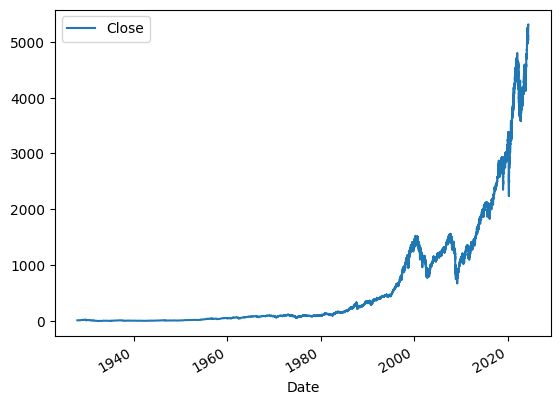

In [6]:
sp500.plot.line(y='Close',use_index=True)

In [7]:
sp500.drop('Dividends',axis=1, inplace=True)

In [8]:
sp500.drop('Stock Splits',axis=1, inplace=True)

In [9]:
sp500.head()

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


Setting up the target

In [11]:
sp500["Tomorrow"]=sp500["Close"].shift(-1)
sp500.head(3)

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999


In [12]:
sp500['Target']=(sp500['Tomorrow']>sp500['Close']).astype(int)
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0


In [13]:
sp500=sp500.loc['1990-01-01':].copy()
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0


Initial ML model

In [15]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=300,min_samples_split=100,random_state=1)

train=sp500.iloc[:-100]                                     #cant use cross validation or anyother splitting
test=sp500.iloc[-100:]                                                    #may cause leakage

predictors=['Close','Volume','Open','High','Low']
model.fit(train[predictors],train['Target'])

RandomForestClassifier(min_samples_split=100, n_estimators=300, random_state=1)

In [16]:
from sklearn.metrics import precision_score

predictions=model.predict(test[predictors])

In [17]:
import pandas as pd

predictions=pd.Series(predictions,index=test.index)

In [19]:
precision_score(test['Target'],predictions)

0.75

In [20]:
combined=pd.concat([test['Target'],predictions],axis=1)

<Axes: xlabel='Date'>

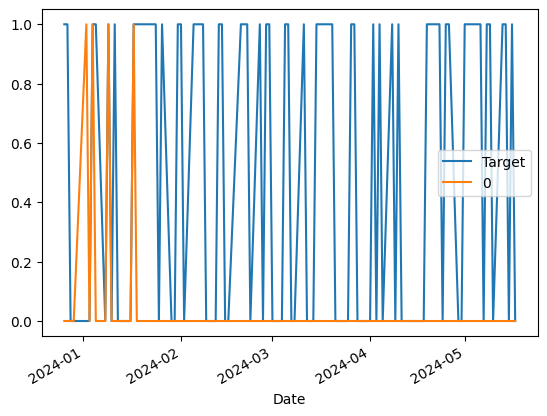

In [21]:
combined.plot()

In [37]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [38]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i + step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [39]:
predictions=backtest(sp500,model,predictors)

In [40]:
predictions['Predictions'].value_counts()

Predictions
0    3538
1    2623
Name: count, dtype: int64

In [41]:
precision_score(predictions['Target'],predictions['Predictions'])

0.5272588638963019

In [42]:
predictions['Target'].value_counts()/predictions.shape[0]

Target
1    0.534653
0    0.465347
Name: count, dtype: float64

That is only 53% of the time the the predictions were helpful

Now, adding additional predictors:<br>
Performance of the market in 2 days,<br> 5 days, <br>60 days(~3 months),<br> 250 days(1 year),<br> 1000 days(~4 years)

In [43]:
horizons=[2,5,60,250,1000]
new_predictors=[]
for horizon in horizons:
  rolling_averages=sp500.rolling(horizon).mean()

  ratio_column=f"Close Ration_{horizon}"
  sp500[ratio_column]=sp500["Close"]/rolling_averages["Close"]

  trend_column=f"Trend_{horizon}"
  sp500[trend_column]=sp500.shift(1).rolling(horizon).sum()['Target']

  new_predictors+=[ratio_column,trend_column]

In [44]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close Ration_2,Trend_2,Close Ration_5,Trend_5,Close Ration_60,Trend_60,Close Ration_250,Trend_250,Close Ration_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
sp500=sp500.dropna()

In [46]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close Ration_2,Trend_2,Close Ration_5,Trend_5,Close Ration_60,Trend_60,Close Ration_250,Trend_250,Close Ration_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0


In [47]:
model=RandomForestClassifier(n_estimators=400,min_samples_split=50,random_state=1)

In [48]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds>=.6]=1
    preds[preds<.6]=0
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [49]:
predictions=backtest(sp500,model,new_predictors)

In [50]:
predictions['Predictions'].value_counts()

Predictions
0.0    4387
1.0     773
Name: count, dtype: int64

In [51]:
precision_score(predictions['Target'],predictions['Predictions'])

0.5666235446313066